In [3]:
import pandas as pd
data = pd.read_csv('Customers.csv')

In [4]:
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
111,112,Female,19,63,54
120,121,Male,27,67,56
2,3,Female,20,16,6
181,182,Female,32,97,86
138,139,Male,19,74,10


In [6]:
# Taking only necessary data columns
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
116,65,43
35,33,81
18,23,29
198,137,18
129,71,75


In [7]:
# Renaming the data columns for easy access
data = data.rename(columns={'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})
data.sample(5)

,income,score
97,60,50
169,87,63
188,103,17
53,43,60
95,60,52


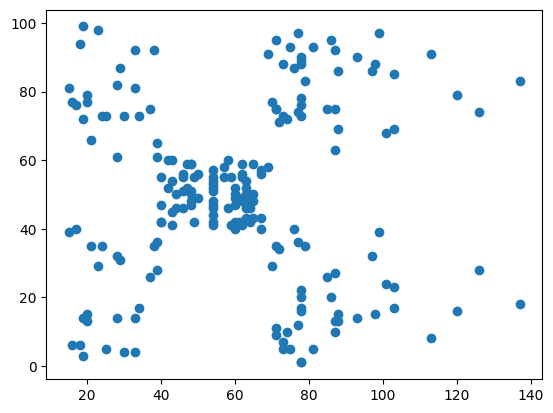

In [8]:
# To display in the graph
import matplotlib.pyplot as plt
# x and y axis
plt.scatter(data['income'], data['score'])

# how to find the best K value


In [10]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
# WCSS Error checking
wcss_error = []

for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

D:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Program Files\Python310\lib\site-packages\skl

In [11]:
wcss_error

[269981.28,
 183154.57952156942,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37271.8862365895,
 30273.394312070042,
 24986.52564064288,
 22787.73704390847,
 19692.557418227767]

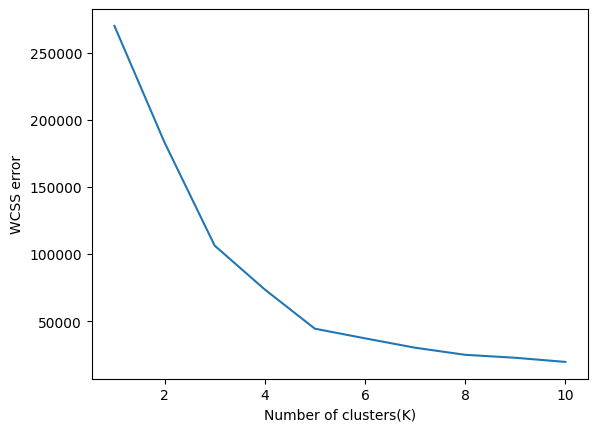

In [13]:
plt.xlabel('Number of clusters(K)')
plt.ylabel('WCSS error')
plt.plot(k_values, wcss_error)

In [14]:
# Best K value is 5
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)
pred

D:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [15]:
data.head(5)

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [16]:
# Add new column to data, column name = cluster and add the predicted values to it
data['cluster'] = pred
data.head(5)

,income,score,cluster
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3


In [22]:
# For saving the unique values data rows
c1 = data[data['cluster']==0]
c2 = data[data['cluster']==1]
c3 = data[data['cluster']==2]
c4 = data[data['cluster']==3]
c5 = data[data['cluster']==4]
c1.head(5)

,income,score,cluster
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
131,71,75,0


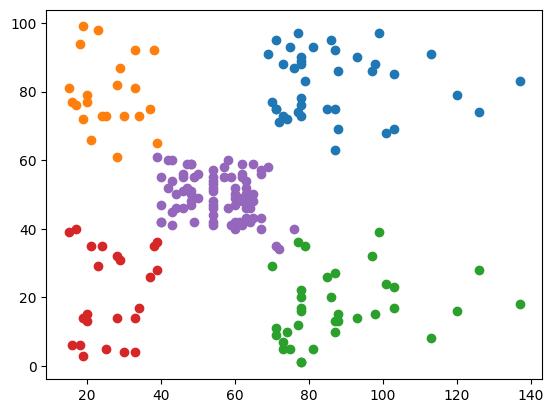

In [21]:
# For displaying the data set in a graph
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])

In [23]:
# to find the center of the cluster
model.cluster_centers_

array([[86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

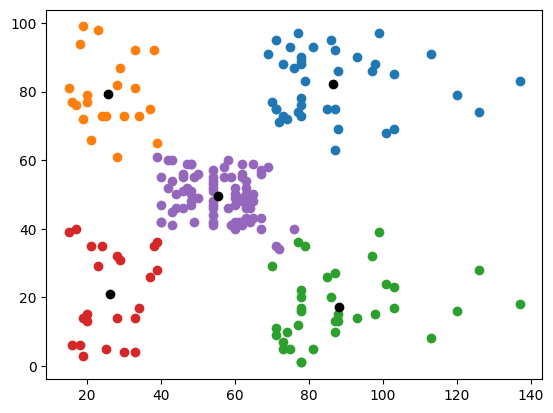

In [26]:
# Showing the cluster center with the clusters
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black')